# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [3]:
import numpy as np
import pandas as pd

def montecarlo(f,a,b,N):
    u=np.random.uniform(a,b,N)
    y=f(u)
    return np.mean(y)*(b-a)
def montecarlo2(region,ax,bx,ay,by,N):  
    X=np.random.uniform(ax,bx,N)
    Y=np.random.uniform(ay,by,N)
    return np.mean(region(X,Y)) * ((by-ay)*(bx-ax))

In [4]:
N=[10, 100, 1000, 10000, 100000]

def g(x):
    return np.sin(x)*np.log(x)

def f(x):
    return np.e**x*np.log(x)
tabla=pd.DataFrame(columns=["Aprox g(x)","Aprox f(x)"], index=N)
for i in (N):
    tabla.loc[i,"Aprox g(x)"]= montecarlo(g,2,2.1,i)
    tabla.loc[i,"Aprox f(x)"]= montecarlo(f,2,2.1,i)
tabla

,Aprox g(x),Aprox f(x)
10,0.063739,0.563646
100,0.063625,0.55927
1000,0.063645,0.557713
10000,0.063645,0.558204
100000,0.063644,0.557915


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

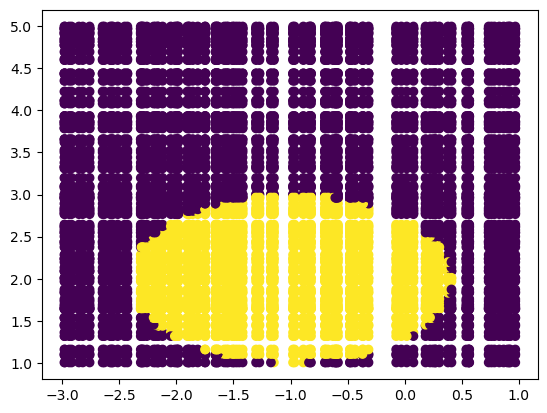

In [8]:
def bernoulli(x,y):
    return x**2+2*y**2 <= -2*x+8*y-7

import matplotlib.pyplot as plt
%matplotlib inline
N,ax,bx,ay,by=100,-3,1,1,5
np.random.seed(N)
X=np.random.uniform(ax,bx,N)
Y=np.random.uniform(ay,by,N)
X,Y=np.meshgrid(X,Y)
plt.scatter(X,Y, c=bernoulli(X,Y))

In [11]:
montecarlo2(bernoulli,-3,1,1,5,100000)

4.40992

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

#### Valoración de Opciones Financieras: 
En el contexto de las opciones financieras, la integración de Montecarlo se utiliza para valorar opciones en mercados donde los modelos tradicionales basados en ecuaciones diferenciales estocásticas pueden no ser aplicables. Al simular múltiples trayectorias de precios de activos subyacentes, se puede estimar el valor de una opción y su sensibilidad a diversos factores como la volatilidad, el tiempo y los rendimientos esperados.


#### Gestión de Riesgos: 
La integración de Montecarlo se utiliza ampliamente en la gestión de riesgos financieros para evaluar el impacto de eventos extremos en carteras de inversión o en el balance general de una institución financiera. Mediante la simulación de diferentes escenarios macroeconómicos y cambios en variables clave como tasas de interés, tipos de cambio y precios de activos, los analistas pueden estimar la probabilidad de pérdidas significativas y tomar decisiones informadas sobre la mitigación del riesgo.


#### Optimización de Carteras: 
En la construcción y optimización de carteras de inversión, la integración de Montecarlo se utiliza para evaluar el rendimiento esperado y el riesgo asociado con diferentes activos.